In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/diveintocode-ml/splint28

/content/gdrive/My Drive/diveintocode-ml/splint28


# 問題0】Tips
前回は形態素解析にpythonで書かれたJanomeを使いました。
他にも便利なライブラリがあるので是非使用してみてください。

Mecab

chariot

nltk

StanfordNLP

Ginza

# 【問題1】NLP復習
今回はslack分析を行います。
使用するファイルは以下の５つです。

2019-01-ai.json: 2019-01-aiのメッセージ履歴に関するデータ

random.json: randomのメッセージ履歴に関するデータ

global.json: globalのメッセージ履歴に関するデータ

users_dict.json: ユーザーID: ユーザーの名前

emoji.json: 絵文字の名前: 絵文字のURL

サンプルコード

In [3]:
# jsonを扱うライブラリ
import json

# swagger
f = open('./slack_data/swagger.json', 'r')
# jsonをdict型に変換
swagger_from_json = json.load(f)
# fiel開いたら閉じる
f.close()
# どのような構造になっているかを確認してください
print(swagger_from_json.keys())

dict_keys(['consumes', 'produces', 'schemes', 'swagger', 'info', 'host', 'basePath', 'paths', 'definitions', 'parameters', 'responses', 'securityDefinitions'])


In [4]:
# slack message 2019.ai
f = open('./slack_data/2019-01-ai.json', 'r')
# jsonをdict型に変換
message_from_json = json.load(f)
# fiel開いたら閉じる
f.close()
# どのような構造になっているかを確認してください
print(message_from_json)

{'ok': True, 'messages': [{'client_msg_id': '6f87c23f-cead-4eb0-b814-89adc7173025', 'type': 'message', 'text': '腹痛のため遅れます。', 'user': 'UEG9UR1AM', 'ts': '1554425975.002100', 'reactions': [{'name': 'annoying_dog', 'users': ['U9SL33S1M'], 'count': 1}]}, {'client_msg_id': 'B36D189F-05E1-42AD-9878-27C7A6097CEE', 'type': 'message', 'text': '<https://www.facebook.com/yoshiki.shimamoto/posts/2235648403161371>', 'user': 'UEVMB7YDN', 'ts': '1554423870.001200', 'attachments': [{'title': 'Yoshiki Shimamoto', 'title_link': 'https://www.facebook.com/yoshiki.shimamoto/posts/2235648403161371', 'text': '【祝！Yahoo!ニュースに掲載されました！】 当社の世界初・液体画像認識AI「DeepLiquid」（ディープリキッド）がYahoo!ニュースに掲載されました！ -------- この水質管理を、カメラとディープラーニング（深層学習）でできないか──こんなことに着目したベンチャー企業AnyTech（東京都渋谷区）が、水質を判定できるAI（人工知能）を開発した。...', 'fallback': 'Yoshiki Shimamoto', 'image_url': 'https://external-iad3-1.xx.fbcdn.net/safe_image.php?d=AQDvvrDhOnG-g-dB&w=400&h=400&url=https%3A%2F%2Flpt.c.yimg.jp%2Famd%2F20190404-00000048-zdn_n-000-view.jpg&cfs=1&_nc_h

In [5]:
# slack emoji.json
f = open('./slack_data/emoji.json', 'r')
# jsonをdict型に変換
emoji_from_json = json.load(f)
# fiel開いたら閉じる
f.close()
# どのような構造になっているかを確認してください
print(emoji_from_json.items())

dict_items([('ok', True), ('emoji', {'bowtie': 'https://emoji.slack-edge.com/T0CGKPB7W/bowtie/f3ec6f2bb0.png', 'squirrel': 'https://emoji.slack-edge.com/T0CGKPB7W/squirrel/465f40c0e0.png', 'glitch_crab': 'https://emoji.slack-edge.com/T0CGKPB7W/glitch_crab/db049f1f9c.png', 'piggy': 'https://emoji.slack-edge.com/T0CGKPB7W/piggy/b7762ee8cd.png', 'cubimal_chick': 'https://emoji.slack-edge.com/T0CGKPB7W/cubimal_chick/85961c43d7.png', 'dusty_stick': 'https://emoji.slack-edge.com/T0CGKPB7W/dusty_stick/6177a62312.png', 'slack': 'https://emoji.slack-edge.com/T0CGKPB7W/slack/7d462d2443.png', 'pride': 'https://emoji.slack-edge.com/T0CGKPB7W/pride/56b1bd3388.png', 'thumbsup_all': 'https://emoji.slack-edge.com/T0CGKPB7W/thumbsup_all/50096a1020.gif', 'slack_call': 'https://emoji.slack-edge.com/T0CGKPB7W/slack_call/b81fffd6dd.png', 'shipit': 'alias:squirrel', 'white_square': 'alias:white_large_square', 'black_square': 'alias:black_large_square', 'simple_smile': 'https://a.slack-edge.com/21511/img/emo

In [6]:
# slack emoji.json
f = open('./slack_data/global.json', 'r')
# jsonをdict型に変換
global_from_json = json.load(f)
# fiel開いたら閉じる
f.close()
# どのような構造になっているかを確認してください
print(global_from_json.items())

dict_items([('ok', True), ('messages', [{'user': 'UHNEF4ZEZ', 'type': 'message', 'subtype': 'channel_join', 'ts': '1554367090.000200', 'text': '<@UHNEF4ZEZ> has joined the channel'}, {'user': 'UHLJFK2EQ', 'type': 'message', 'subtype': 'channel_join', 'ts': '1554296755.000400', 'text': '<@UHLJFK2EQ> has joined the channel'}, {'user': 'UHMKNH4EB', 'type': 'message', 'subtype': 'channel_join', 'ts': '1554294029.000200', 'text': '<@UHMKNH4EB> has joined the channel'}, {'user': 'UHLRDSTLN', 'type': 'message', 'subtype': 'channel_join', 'ts': '1554223158.000200', 'text': '<@UHLRDSTLN> has joined the channel'}, {'user': 'UHGE8NQNB', 'type': 'message', 'subtype': 'channel_join', 'ts': '1553879516.000400', 'text': '<@UHGE8NQNB> has joined the channel'}, {'user': 'UHCSZQ74L', 'type': 'message', 'subtype': 'channel_join', 'ts': '1553747260.000200', 'text': '<@UHCSZQ74L> has joined the channel'}, {'user': 'UHD8EJ0T1', 'type': 'message', 'subtype': 'channel_join', 'ts': '1553705693.001400', 'text':

In [7]:
# slack emoji.json
f = open('./slack_data/random.json', 'r')
# jsonをdict型に変換
random_from_json = json.load(f)
# fiel開いたら閉じる
f.close()
# どのような構造になっているかを確認してください
print(random_from_json.items())

dict_items([('ok', True), ('messages', [{'user': 'UHNEF4ZEZ', 'type': 'message', 'subtype': 'channel_join', 'ts': '1554367091.038200', 'text': '<@UHNEF4ZEZ> has joined the channel'}, {'client_msg_id': '180df26d-49ff-4eaf-ba4b-4341008fd8e9', 'type': 'message', 'text': '<!channel>\n受講生の皆さん、こんにちは！\nDIVE INTO CODEのCMOの丸田です。\n\n【Facebookシェアのお願い】本日、DIVE INTO CODEのFacebookで、DEMODAY 6thのご登壇者の＊田中元基さん＊をご紹介しました！＊ぜひ応援の気持ちを込めて、投稿のチェックやシェアをしていただけると嬉しいです＊ :blush:\nどうぞよろしくお願い致します。\n\n<https://www.facebook.com/diveintocode.jp/posts/1323804734424646>', 'user': 'UGJTSGW1H', 'ts': '1554359771.037900', 'attachments': [{'title': 'DIVE INTO CODE', 'title_link': 'https://www.facebook.com/diveintocode.jp/posts/1323804734424646', 'text': '【DEMODAY6th ご登壇者様のご紹介！】4/7のDEMODAY6thもいよいよ目前！本日はご登壇者の田中元基さんをご紹介します。 DIVE INTO...', 'fallback': 'DIVE INTO CODE', 'image_url': 'https://scontent-iad3-1.xx.fbcdn.net/v/t1.0-9/56760725_1323804164424703_914698635273306112_o.png?_nc_cat=111&_nc_ht=scontent-iad3-1.xx&oh=86086eeb4b6f

In [0]:
# swagger_from_json
# message_from_json
# emoji_from_json
# global_from_json
# random_from_json

## 【問】
以下のように分析してください

データを観察
全単語数をカウントする
全単語の種類をカウントする

In [9]:
swagger_from_json.values()

dict_values([['application/json', 'application/jp.cubki.scnnr.v1+json'], ['application/jp.cubki.scnnr.v1+json'], ['http'], '2.0', {'description': '\\#CBK scnnr is an image recognition service for fashion photos.\n\nThis API recognizes fashion items included in a photo, and these items have some labels.\n\nPlease see more details on [https://scnnr.cubki.jp/](https://scnnr.cubki.jp/) about this service.\n\nAnd please note that all endpoints require an API key. These keys are issued by contact from [https://scnnr.cubki.jp/](https://scnnr.cubki.jp/).\n\nThank you for your consideration. Enjoy!\n', 'title': '#CBK scnnr API', 'version': '1.4.7'}, 'api.scnnr.cubki.jp', '/v1', {'/auth/tokens': {'post': {'description': 'This endpoint aims to send requests from any public environment. (e.g., Browser application with JavaScript)\n\nIn general, secret API keys should not be embedded in the situations because it has the leakage risk.\nTherefore, we issue public API key for the situation.\n\nPublic 

In [0]:
# swagger_from_json
# message_from_json
# emoji_from_json
# global_from_json
# random_from_json

json_lists = [swagger_from_json, message_from_json, emoji_from_json, global_from_json, random_from_json]

swagger_list = []
message_list = []
emoji_list = []
grobal_list = []
random_list = []

for dic in message_from_json["messages"]:
    text = dic["text"]
    message_list += [text]

In [0]:
for dic in global_from_json["messages"]:
    text = dic["text"]
    grobal_list += [text]

In [0]:
for dic in random_from_json["messages"]:
    text = dic["text"]
    random_list += [text]

In [0]:
all_list = message_list + grobal_list + random_list

In [14]:
len(all_list)

204

In [0]:
#クリーニング
# 正規表現操作のライブラリ
import re
clean_list = []
for text in all_list:
    BAD_SYMBOL = re.compile(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#亜-熙ぁ-んァ-ヶ]+)")
    text = re.sub(BAD_SYMBOL, '', text)
    BAD_SYMBOL = re.compile('[\n*`\s\＊]')
    text = re.sub(BAD_SYMBOL, '', text)
    BAD_SYMBOL = re.compile('<.{0,20}>')
    text = re.sub(BAD_SYMBOL, '', text)
    BAD_SYMBOL = re.compile('【.{1,20}】')
    text = re.sub(BAD_SYMBOL, '', text)
    BAD_SYMBOL = re.compile(':.{1,20}:')
    text = re.sub(BAD_SYMBOL, '', text)
    clean_list += [text]

In [17]:
! pip install janome

    100% |████████████████████████████████| 20.0MB 1.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/b4/cb/0e/def1b589bc52cce84cbdd05c75df604c2130ad8ce1e94f84b7
Successfully built janome


In [23]:
! pip install collections

  Could not find a version that satisfies the requirement collections (from versions: )
No matching distribution found for collections


In [0]:
# import janome
from janome.tokenizer import Tokenizer
t = Tokenizer()
all_word_list = []
sentence_list = []

for text in clean_list:
    token = t.tokenize(text)
    do_list = []
    do_list += [word.surface for word in token if word.part_of_speech.split(',')[0] in ['名詞', '動詞']]
    all_word_list += do_list
    sentence_list += [do_list]

In [21]:
len(all_word_list)

4294

In [0]:
from collections import Counter
count = Counter(all_word_list)

In [26]:
sorted(count.items(), key=lambda x:x[1], reverse=True) # reverse

[('し', 121),
 ('/', 58),
 ('4', 42),
 ('い', 38),
 ('方', 35),
 ('DIVEINTOCODE', 34),
 ('さん', 33),
 ('する', 33),
 ('ルワンダ', 33),
 ('アフリカ', 32),
 ('者', 32),
 ('参加', 31),
 ('さ', 31),
 ('いる', 31),
 ('hasjoinedthechannel', 30),
 ('プロジェクト', 28),
 ('こと', 26),
 ('れ', 26),
 ('皆さん', 26),
 ('生', 24),
 ('の', 24),
 ('月', 22),
 ('エンジニア', 21),
 ('よう', 21),
 ('教育', 21),
 ('受講', 21),
 ('ください', 20),
 ('人', 20),
 ('IT', 20),
 ('お願い', 19),
 ('DEMODAY', 19),
 ('-', 18),
 ('支援', 18),
 ('ため', 17),
 ('いたし', 17),
 ('本日', 17),
 ('個人', 17),
 ('(', 17),
 ('コース', 17),
 ('ビジネス', 17),
 ('登壇', 17),
 ('1', 16),
 ('3', 16),
 ('6', 16),
 ('年', 16),
 ('円', 16),
 ('日', 15),
 (')', 15),
 ('おり', 15),
 ('CMO', 15),
 ('丸田', 15),
 ('DIC', 15),
 ('会', 14),
 ('私', 14),
 ('イベント', 14),
 ('th', 14),
 ('5', 13),
 ('なり', 12),
 ('希望', 12),
 ('あり', 11),
 ('.', 11),
 ('紹介', 11),
 ('必要', 11),
 ('ご覧', 11),
 ('万', 11),
 ('的', 11),
 ('名', 11),
 ('遅れ', 10),
 ('卒業', 10),
 ('き', 10),
 ('機会', 10),
 ('クラウドファンディング', 10),
 ('プログラミング', 10),
 (',', 10)

# 【問題2】WordCloud
ワードクラウドとは出現頻度などに応じて、
単語を空間上にプロットする手法です。
WordCloud


## 【問】
今回のslackデータからワードクラウドを作成してください。

In [33]:
! pip install wordcloud

In [0]:
corpus = []
corpus_t = []
corpus_c = ""
for i in range(len(clean_list)):
   a = t.tokenize(clean_list[i], wakati=True)
   for j in a:
       corpus_c = corpus_c + " " + j

In [0]:
from wordcloud import WordCloud
stop = ["ます", "です", "さん", "から", "まし", "する", "こと", "いる", "ない", "まで", "たい"]
wordcloud = WordCloud(background_color="white",width=800, 
                      font_path="/Library/Fonts/Arial Unicode.ttf",
                      stopwords= stop, height=600).generate(corpus_c)

wordcloud.to_file("./wordcloud_sample.png")

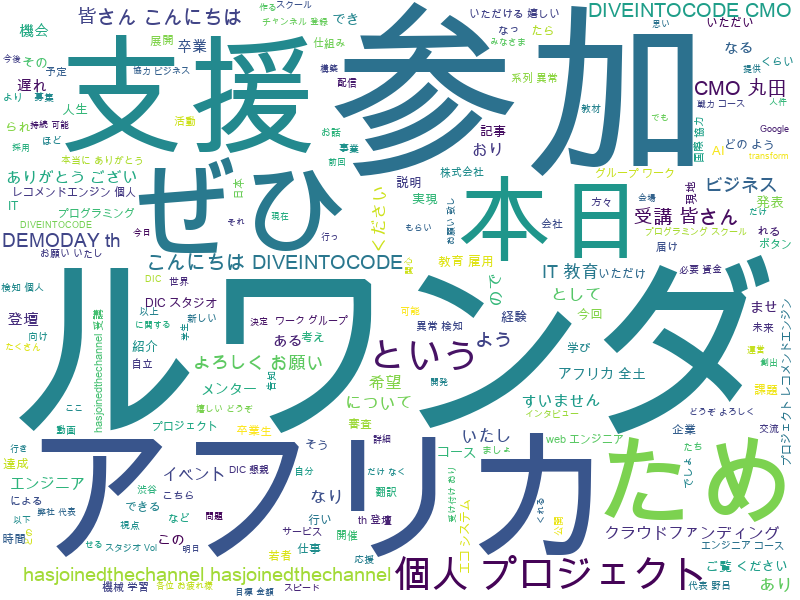

In [0]:
from IPython.display import Image, display_png
display_png(Image("wordcloud_sample.png"))

# 【問題3】あの人はどんな人？
## 【問】
誰がどのような単語を使っているかを分析してください。

例


{

'noro': {

'ルワンダ': 12,

'RubyMine': 7,

},

'mentor_goto': {

'自然言語処理': 29,

'mecab': 3,

},

...

...

}


In [0]:
f = open('slack_data/users_dict.json', 'r')
userdict_from_json = json.load(f)
f.close()
print(userdict_from_json.keys())

dict_keys(['U0CGPM9T2', 'U5WEHDZRC', 'U71KZN0HL', 'U7MLFT82K', 'U9SL33S1M', 'UCFCLSRCK', 'UEG9UR1AM', 'UEHD8A6H3', 'UEJ7TBV0R', 'UEJA5HS3G', 'UEVMB7YDN', 'UF1A4QA10', 'UF1KE2X8B', 'UG0P51PNC'])


In [0]:
userdict_from_json

{'U0CGPM9T2': 'Hiroyoshi Noro',
 'U5WEHDZRC': 'mentor_tatsuya_suzuki',
 'U71KZN0HL': 'mentor_tetsuro_nishio',
 'U7MLFT82K': 'mentor Shun Nakamura',
 'U9SL33S1M': 'yoshiko_endo',
 'UCFCLSRCK': 'mano_hironobu',
 'UEG9UR1AM': 'noritsugu_yamada',
 'UEHD8A6H3': 'yasunori_kimura',
 'UEJ7TBV0R': 'Kazuki_Egusa',
 'UEJA5HS3G': 'moriyasu_komiya',
 'UEVMB7YDN': 'Yohei Kawakami',
 'UF1A4QA10': 'naoki_sasaki',
 'UF1KE2X8B': 'Ayako Nonaka',
 'UG0P51PNC': 'kiyoshige.goto'}

In [0]:
def cojin_text(user):
    cojintext = []
    for dic in message_from_json["messages"]:
        text = dic["text"]
        if dic["user"] == user:
            cojintext += [text]
    for dic in global_from_json["messages"]:
        text = dic["text"]
        if dic["user"] == user:
            cojintext += [text]
    for dic in random_from_json["messages"]:
        text = dic["text"]
        if dic["user"] == user:
            cojintext += [text]
    return cojintext

def clearn_text(alltext):
    c_text = []
    for text in alltext:
        BAD_SYMBOL = re.compile(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#亜-熙ぁ-んァ-ヶ]+)")
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('[\n*`\s\＊]')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('<.{0,20}>')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('【.{1,20}】')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile(':.{1,20}:')
        text = re.sub(BAD_SYMBOL, '', text)
        c_text += [text]
    return c_text

def nukidasi(c_text):
    t = Tokenizer()
    b_list = []
    doc_list = []
    for text in c_text:
        token = t.tokenize(text)
        do_list = []
        do_list += [word.surface for word in token if word.part_of_speech.split(',')[0] in ['名詞', '動詞','形容詞']]
        doc_list += do_list
        b_list += [do_list]
    cont = Counter(doc_list)
    print(sorted(cont.items(), key=lambda x:x[1], reverse=True))

def matome(user):
    a = cojin_text(user)
    a = clearn_text(a)
    print("ユーザーネーム: {} さんの発言単語降順".format(userdict_from_json[user]))
    nukidasi(a)

In [0]:
matome('UEVMB7YDN')

ユーザーネーム: Yohei Kawakami さんの発言単語降順
[('僕', 2), ('今日', 2), ('体', 1), ('一番', 1), ('大変', 1), ('よけれ', 1), ('いつ', 1), ('相談', 1), ('乗り', 1), ('やつ', 1), ('朝', 1), ('助け', 1), ('くれ', 1), ('メンター', 1), ('方', 1), ('午前', 1), ('中', 1), ('書か', 1), ('れ', 1), ('Quiita', 1), ('記事', 1), ('感謝', 1), ('スピード', 1), ('感', 1), ('見習わ', 1), ('やり', 1), ('おっ', 1), ('川上', 1), ('問題', 1), ('８', 1), ('これ', 1), ('し', 1)]


In [0]:
matome('UEG9UR1AM')

ユーザーネーム: noritsugu_yamada さんの発言単語降順
[('分', 4), ('遅れ', 3), ('そう', 2), ('なり', 2), ('腹痛', 1), ('ため', 1), ('木村', 1), ('さん', 1), ('参加', 1), ('し', 1), ('くれる', 1), ('求め', 1), ('dic', 1), ('ai', 1), ('エクスポ', 1), ('招待', 1), ('券', 1), ('あり', 1), ('着く', 1), ('の', 1), ('30', 1), ('頃', 1), ('20', 1), ('3', 1), ('違い', 1), ('!', 1), ('なん', 1), ('いい', 1), ('はず', 1), ('5', 1), ('遅れる', 1), ('今', 1), ('起き', 1), ('array', 1), ('化', 1), ('する', 1), ('メモリ', 1), ('エラー', 1)]


# 【問題4】誰が一番かまってもらってる？
## 【問】
誰が一番リアクションをもらっているかを分析してください。



In [0]:
readict = {}
for dic in message_from_json["messages"]:
    user = userdict_from_json[dic["user"]]
    try:
        for reaction in dic["reactions"]:
            if user in reaction.keys():
                readict[user] = readict[user] + reaction["count"]
            else:
                readict[user] =  reaction["count"]
    except KeyError:
        continue

In [0]:
readict

{'noritsugu_yamada': 2,
 'Yohei Kawakami': 1,
 'Kazuki_Egusa': 2,
 'Ayako Nonaka': 1,
 'moriyasu_komiya': 2,
 'naoki_sasaki': 1,
 'mentor Shun Nakamura': 1,
 'kiyoshige.goto': 1}

# 【問題5】Mr.Noro or Not Mr.Noro
## 【問】

ある発言に対して、

野呂さんの発言か別の人の発言かを予測するモデルを作成してください。

2019年4月5日13:00以降がテストデータになります。

下記のデータセットも参考にして構いません。

NLPデータセット

In [0]:
norotext = cojin_text("U0CGPM9T2")
norotext = clearn_text(norotext)

In [0]:
def not_noro(user):
    cojintext = []
    for dic in message_from_json["messages"]:
        text = dic["text"]
        if dic["user"] is not user:
            cojintext += [text]
    for dic in global_from_json["messages"]:
        text = dic["text"]
        if dic["user"] is not user:
            cojintext += [text]
    for dic in random_from_json["messages"]:
        text = dic["text"]
        if dic["user"]  is not user:
            cojintext += [text]
    return cojintext

In [0]:
def wakati(c_text):
    corpus = []
    for i in range(len(c_text)):
       a = t.tokenize(c_text[i], wakati=True)
       corpus += [a]
    return corpus

In [0]:
norotext = cojin_text("U0CGPM9T2")
norotext = clearn_text(norotext)
norotext = wakati(norotext)
not_norotext = not_noro("U0CGPM9T2")
not_norotext = clearn_text(not_norotext)
not_norotext = wakati(not_norotext)
context = norotext + not_norotext

In [0]:
import numpy as np
ytrain = np.hstack((np.ones(len(norotext)), np.zeros(len(not_norotext))))

In [0]:
#数値変換辞書作成
norodict = {}
count = 1
for text in context:
    for tango in text:
        if  tango in norodict.keys():
            pass
        else:
            norodict[tango] = count
            count += 1

In [0]:
maxlen = 0
for text in context:
    if len(text) > maxlen:
        maxlen = len(text)

In [0]:
# 数値変換とゼロうめ
context_ar = np.empty((0, maxlen))
for text in context:
    leng = len(text)
    texts = np.zeros(maxlen)#zeroうめ
    for i, tango in enumerate(text):
        texts[i + maxlen - leng] = norodict[tango] #数値変換
    context_ar = np.vstack((context_ar, texts))

In [0]:
#中身ないアレーは消す
delind = np.where(np.max(context_ar, axis=1) == 0)[0]
context_ar = np.delete(context_ar, delind, axis=0)
ytrain = np.delete(ytrain, delind)

In [54]:
import keras
from keras.layers.embeddings import Embedding
from keras.layers import Input, Dense, GRU
from keras.models import Model

Using TensorFlow backend.


In [0]:
input_dim = max(norodict.values()) +1

In [56]:
#モデル構築
imp = Input(shape=(None,))
z = Embedding(input_dim, 150, mask_zero=True)(imp)
z = GRU(150)(z)
z = Dense(100)(z)
out = Dense(1, activation="sigmoid")(z)

model = Model(imp, out)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 150)         255750    
_________________________________________________________________
gru_1 (GRU)                  (None, 150)               135450    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 406,401
Trainable params: 406,401
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(context_ar, ytrain, batch_size=19 ,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
189/189 [==============================] - 17s 88ms/step - loss: 0.6260 - acc: 0.7725
Epoch 2/10
189/189 [==============================] - 14s 72ms/step - loss: 0.4973 - acc: 0.8148
Epoch 3/10
189/189 [==============================] - 14s 74ms/step - loss: 0.4201 - acc: 0.8148
Epoch 4/10
189/189 [==============================] - 14s 73ms/step - loss: 0.3756 - acc: 0.8148
Epoch 5/10
189/189 [==============================] - 14s 73ms/step - loss: 0.3414 - acc: 0.8148
Epoch 6/10
189/189 [==============================] - 14s 74ms/step - loss: 0.3171 - acc: 0.8042
Epoch 7/10
189/189 [==============================] - 14s 74ms/step - loss: 0.3065 - acc: 0.7831
Epoch 8/10
189/189 [==============================] - 14s 73ms/step - loss: 0.2960 - acc: 0.7884
Epoch 9/10
189/189 [==============================] - 13s 71ms/step - loss: 0.2952 - acc: 0.7884
Epoch 10/10
189/189 [==============================] - 13s 71ms/step - loss: 0.

In [0]:
test = ["@channel *【速報】:お祝い:目標金額を達成しました！*みなさま本当にありがとうございます！本日、目標金額300万円のご支援を達成いたしました！"]


In [0]:
test = clearn_text(test)
test = wakati(test)
texts = np.zeros(len(test[0]))#zeroうめ
for test1 in test:
    for i, tango in enumerate(test1):
        try:
            texts[i] = norodict[tango] #数値変換
        except KeyError:
            continue

In [0]:
test_ar = np.array(texts).reshape(1,-1)

In [66]:
model.predict(test_ar)

array([[0.22440536]], dtype=float32)